In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Importing Base Learners
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import log_loss
import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)

#Importing Ensemble Classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
#Reading the csv dataset
data = pd.read_csv("C://Users/suman/OneDrive/Desktop/heart.csv", encoding='ANSI')
data.columns
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Total number of rows and columns
data.shape

(303, 14)

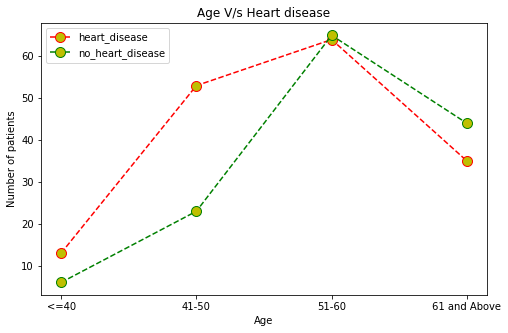

In [4]:
# Plotting a line graph for Age V/s heart disease
plt.subplots(figsize =(8,5))
classifiers = ['<=40', '41-50', '51-60','61 and Above']
heart_disease = [13, 53, 64, 35]
no_heart_disease = [6, 23, 65, 44]
l1 = plt.plot(classifiers, heart_disease , color='r', marker='o', linestyle ='dashed', markerfacecolor='y', markersize=10)
l2 = plt.plot(classifiers, no_heart_disease, color='g',marker='o', linestyle ='dashed', markerfacecolor='y', markersize=10 )

plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age V/s Heart disease')
plt.legend((l1[0], l2[0]), ('heart_disease', 'no_heart_disease'))
plt.show()

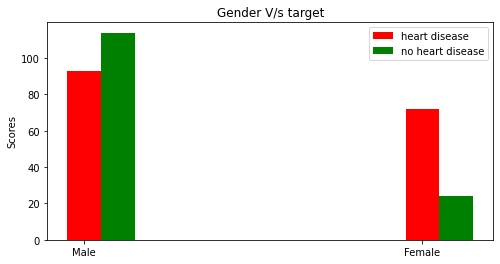

In [5]:
# Plotting a bar graph for Gender V/s target
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize =(8,4))

heart_disease = [93, 72]
rects1 = ax.bar(ind, heart_disease, width, color='r')
no_heart_disease = [114, 24]
rects2 = ax.bar(ind+width, no_heart_disease, width, color='g')

ax.set_ylabel('Scores')
ax.set_title('Gender V/s target')
ax.set_xticks(ind)
ax.set_xticklabels(('Male','Female'))
ax.legend((rects1[0], rects2[0]), ('heart disease', 'no heart disease'))

plt.show()

,cp,thalach,exang,oldpeak,ca,thal
0,3,150,0,2.3,0,1
1,2,187,0,3.5,0,2
2,1,172,0,1.4,0,2
3,1,178,0,0.8,0,2
4,0,163,1,0.6,0,2


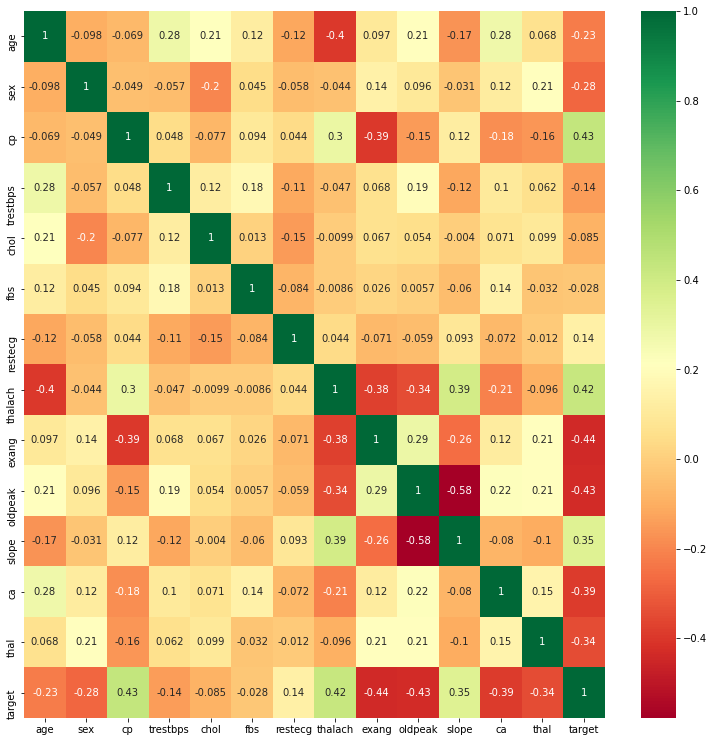

In [6]:
## Feature selection
#get correlation of each feature in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

data=data.drop(['sex', 'fbs', 'restecg', 'slope', 'chol', 'age', 'trestbps'], axis=1)

target=data['target']
data = data.drop(['target'],axis=1)
data.head()

In [7]:
# Splitting the data into training and testing set:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=10)

In [8]:
## Base Learners
# 1. Multinomial Naive Bayes(NB) 
classifierNB=MultinomialNB()
classifierNB.fit(x_train,y_train)
classifierNB.score(x_test, y_test)

y_preds = classifierNB.predict(x_test)
print('MultinomialNB accuracy score: ',accuracy_score(y_test, y_preds))

MultinomialNB accuracy score:  0.7692307692307693


[[34 16]
 [ 5 36]]


<ipython-input-9-41edac3d77d0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-9-41edac3d77d0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


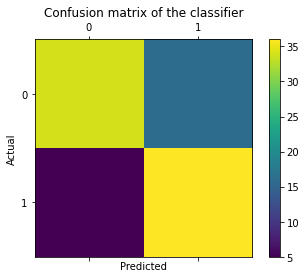



              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.69      0.88      0.77        41

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91



In [9]:
#Graph Plotting and Classification Report
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [10]:
# 2. Logistic Regression(LR)
classifierLR=LogisticRegression()
classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)

y_preds = classifierLR.predict(x_test)
print('Logistic Regression accuracy score: ',accuracy_score(y_test, y_preds))

Logistic Regression accuracy score:  0.7912087912087912


c:\users\suman\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[[36 14]
 [ 5 36]]


<ipython-input-11-100be9f82e70>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-11-100be9f82e70>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


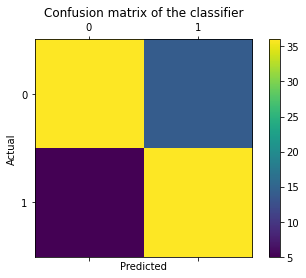



              precision    recall  f1-score   support

           0       0.88      0.72      0.79        50
           1       0.72      0.88      0.79        41

    accuracy                           0.79        91
   macro avg       0.80      0.80      0.79        91
weighted avg       0.81      0.79      0.79        91



In [11]:
#Graph Plotting and Classification Report
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_preds))

In [12]:
# 3. Decision Tree (DT)
classifierDT=DecisionTreeClassifier(criterion="gini", random_state=50, max_depth=3, min_samples_leaf=5)
classifierDT.fit(x_train,y_train)
classifierDT.score(x_test, y_test)

y_preds = classifierDT.predict(x_test)
print('Decision Tree accuracy score: ',accuracy_score(y_test, y_preds))

Decision Tree accuracy score:  0.7582417582417582


[[35 15]
 [ 7 34]]


<ipython-input-13-95037916540e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-13-95037916540e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


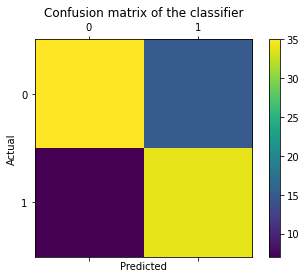



              precision    recall  f1-score   support

           0       0.83      0.70      0.76        50
           1       0.69      0.83      0.76        41

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



In [13]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_preds))

In [14]:
print('Accuracy Report of Base Learning Algorithms: ')
print('--------------------------------------------')
print('Accuracy of naive bayes: {}'.format(classifierNB.score(x_test, y_test)))
print('Accuracy of logistic regression: {}'.format(classifierLR.score(x_test, y_test)))
print('Accuracy of decision tree: {}'.format(classifierDT.score(x_test, y_test)))

Accuracy Report of Base Learning Algorithms: 
--------------------------------------------
Accuracy of naive bayes: 0.7692307692307693
Accuracy of logistic regression: 0.7912087912087912
Accuracy of decision tree: 0.7582417582417582


In [15]:
# 1. Bagging
classifierBa= BaggingClassifier(max_samples=0.5, max_features=1.0, n_estimators=50)
classifierBa.fit(x_train,y_train)
classifierBa.score(x_test, y_test)

y_preds = classifierBa.predict(x_test)
print('bagging_accuracy score: ',accuracy_score(y_test, y_preds))

bagging_accuracy score:  0.8131868131868132


[[37 13]
 [ 4 37]]


<ipython-input-16-0711812a71fd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-0711812a71fd>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


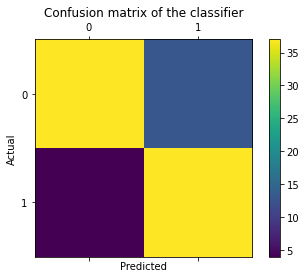



              precision    recall  f1-score   support

           0       0.90      0.74      0.81        50
           1       0.74      0.90      0.81        41

    accuracy                           0.81        91
   macro avg       0.82      0.82      0.81        91
weighted avg       0.83      0.81      0.81        91



In [16]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [17]:
## 2. Boosting (Weight Based Boosting)
#1.AdaBoost Classifier
classifierAdaBoost= AdaBoostClassifier(n_estimators=500)
classifierAdaBoost.fit(x_train,y_train)
classifierAdaBoost.score(x_test, y_test)

y_preds = classifierAdaBoost.predict(x_test)
print('Ada_boost_accuracy score: ',accuracy_score(y_test, y_preds))

Ada_boost_accuracy score:  0.7362637362637363


[[36 14]
 [10 31]]


<ipython-input-18-95037916540e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-18-95037916540e>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


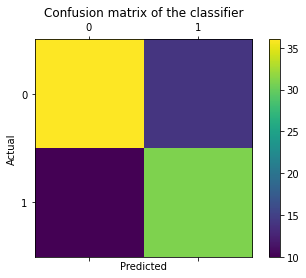



              precision    recall  f1-score   support

           0       0.78      0.72      0.75        50
           1       0.69      0.76      0.72        41

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



In [18]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print('\n')
print(classification_report(y_test, y_preds))

In [19]:
## 2. Boosting (Residual Based Boosting)
#2. GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
classifierGBo= GradientBoostingClassifier(n_estimators=500, learning_rate=1.0, max_depth=1)
classifierGBo.fit(x_train,y_train)
classifierGBo.score(x_test, y_test)

y_preds = classifierGBo.predict(x_test)
print('Gradient_boosting_accuracy score: ',accuracy_score(y_test, y_preds))

Gradient_boosting_accuracy score:  0.8131868131868132


[[39 11]
 [ 6 35]]


<ipython-input-20-41edac3d77d0>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-20-41edac3d77d0>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


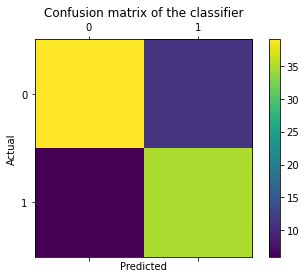



              precision    recall  f1-score   support

           0       0.87      0.78      0.82        50
           1       0.76      0.85      0.80        41

    accuracy                           0.81        91
   macro avg       0.81      0.82      0.81        91
weighted avg       0.82      0.81      0.81        91



In [20]:
#Graph Plotting and Classification Report
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [21]:
## 3. Stacking
Estimator=[('dt',classifierDT),('NV',classifierNB)]
clf = StackingClassifier(estimators=Estimator, final_estimator=LogisticRegression())
clf.fit(x_train,y_train)
clf.score(x_test, y_test)

y_preds = clf.predict(x_test)
print('Stacking accuracy score: ',accuracy_score(y_test, y_preds))

Stacking accuracy score:  0.7692307692307693


[[34 16]
 [ 5 36]]


<ipython-input-22-0711812a71fd>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-22-0711812a71fd>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


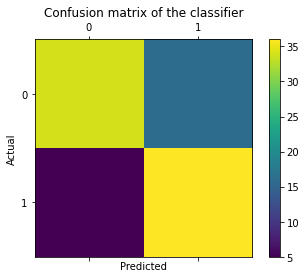



              precision    recall  f1-score   support

           0       0.87      0.68      0.76        50
           1       0.69      0.88      0.77        41

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.79      0.77      0.77        91



In [22]:
import pylab as plt
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print(cmx)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cmx)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('\n')
print(classification_report(y_test, y_preds))

In [23]:
print('CONCLUSION : ')
print('------------------------')
print('Accuracy Report of Base Learning Algorithms: ')
print('--------------------------------------------')
print('Accuracy of naive bayes: {}'.format(classifierNB.score(x_test, y_test)))
print('Accuracy of logistic regression: {}'.format(classifierLR.score(x_test, y_test)))
print('Accuracy of decision tree: {}'.format(classifierDT.score(x_test, y_test)))
print('\n')
print('Accuracy Report of Ensemble Classifiers: ')
print('--------------------------------------------')
print('Bagging Accuracy Score: ',classifierBa.score(x_test, y_test))
print('Ada_boost Accuracy Score: ',classifierAdaBoost.score(x_test, y_test))
print('Gradient Boosting Accuracy Score: ',classifierGBo.score(x_test, y_test))
print('Stacking Accuracy Score: ',clf.score(x_test, y_test))

CONCLUSION : 
------------------------
Accuracy Report of Base Learning Algorithms: 
--------------------------------------------
Accuracy of naive bayes: 0.7692307692307693
Accuracy of logistic regression: 0.7912087912087912
Accuracy of decision tree: 0.7582417582417582


Accuracy Report of Ensemble Classifiers: 
--------------------------------------------
Bagging Accuracy Score:  0.8131868131868132
Ada_boost Accuracy Score:  0.7362637362637363
Gradient Boosting Accuracy Score:  0.8131868131868132
Stacking Accuracy Score:  0.7692307692307693
